<a href="https://colab.research.google.com/github/MunSu2001/File/blob/main/%ED%8C%80_%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8_%EB%8B%B9%EB%87%A8%EB%B3%91(%EC%88%98%EC%A0%95%EB%B3%B8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [3]:
columns = ['임신 횟수', '포도당 농도', '혈압', '주름 두께', '인슐린', '체질량 지수', '당뇨병 가계도 기능', '나이', '당뇨병 유무']

dataset =  pd.read_csv("/content/drive/MyDrive/pima-indians-diabetes.csv", encoding = 'cp949', names = columns)

dataset

,임신 횟수,포도당 농도,혈압,주름 두께,인슐린,체질량 지수,당뇨병 가계도 기능,나이,당뇨병 유무
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   임신 횟수       768 non-null    int64  
 1   포도당 농도      768 non-null    int64  
 2   혈압          768 non-null    int64  
 3   주름 두께       768 non-null    int64  
 4   인슐린         768 non-null    int64  
 5   체질량 지수      768 non-null    float64
 6   당뇨병 가계도 기능  768 non-null    float64
 7   나이          768 non-null    int64  
 8   당뇨병 유무      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
x.describe()

NameError: name 'x' is not defined

In [ ]:
dataset.corr()

,임신 횟수,포도당 농도,혈압,주름 두께,인슐린,체질량 지수,당뇨병 가계도 기능,나이,당뇨병 유무
임신 횟수,1.000000,0.128846,0.141197,-0.082495,-0.072999,0.017518,-0.033927,0.544018,0.221087
포도당 농도,0.128846,1.000000,0.152498,0.056381,0.332383,0.220955,0.136903,0.262408,0.465856
혈압,0.141197,0.152498,1.000000,0.207308,0.089098,0.281777,0.041180,0.239571,0.064882
주름 두께,-0.082495,0.056381,0.207308,1.000000,0.437974,0.392553,0.183498,-0.115873,0.073265
인슐린,-0.072999,0.332383,0.089098,0.437974,1.000000,0.198111,0.185579,-0.040942,0.131984
체질량 지수,0.017518,0.220955,0.281777,0.392553,0.198111,1.000000,0.140546,0.035911,0.292695
당뇨병 가계도 기능,-0.033927,0.136903,0.041180,0.183498,0.185579,0.140546,1.000000,0.032738,0.173245
나이,0.544018,0.262408,0.239571,-0.115873,-0.040942,0.035911,0.032738,1.000000,0.236417
당뇨병 유무,0.221087,0.465856,0.064882,0.073265,0.131984,0.292695,0.173245,0.236417,1.000000


In [ ]:
corr = dataset.corr()
corr_class = corr['당뇨병 유무']
corr_class

,당뇨병 유무
임신 횟수,0.221087
포도당 농도,0.465856
혈압,0.064882
주름 두께,0.073265
인슐린,0.131984
체질량 지수,0.292695
당뇨병 가계도 기능,0.173245
나이,0.236417
당뇨병 유무,1.000000


In [ ]:
dataset['인슐린'].value_counts() # 인슐린 숫자 갯수 = 이상하게 시리 0이 많음 = 잘못된 정보일 확률 높음

,count
인슐린,
0,374
105,11
130,9
140,9
120,8
...,...
127,1
510,1
402,1


In [32]:
#dataset1 = dataset.drop(['인슐린'], axis=1)
dataset2 = dataset.drop(['혈압'], axis=1)
dataset3 = dataset2.drop(['주름 두께'], axis=1)

In [6]:
dataset3

,임신 횟수,포도당 농도,인슐린,체질량 지수,당뇨병 가계도 기능,나이,당뇨병 유무
0,6,148,0,33.6,0.627,50,1
1,1,85,0,26.6,0.351,31,0
2,8,183,0,23.3,0.672,32,1
3,1,89,94,28.1,0.167,21,0
4,0,137,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...
763,10,101,180,32.9,0.171,63,0
764,2,122,0,36.8,0.340,27,0
765,5,121,112,26.2,0.245,30,0
766,1,126,0,30.1,0.349,47,1


In [33]:
x = dataset3.iloc[:,0:6]

y = dataset3.iloc[:,6]

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [37]:
model = Sequential()
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - accuracy: 0.4584 - loss: 2.0294 - val_accuracy: 0.6623 - val_loss: 0.9026
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5912 - loss: 0.9209 - val_accuracy: 0.6169 - val_loss: 0.6934
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5846 - loss: 0.8491 - val_accuracy: 0.5909 - val_loss: 0.6556
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6057 - loss: 0.6880 - val_accuracy: 0.5974 - val_loss: 0.6824
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5671 - loss: 0.7979 - val_accuracy: 0.6104 - val_loss: 0.6449
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5993 - loss: 0.7142 - val_accuracy: 0.6364 - val_loss: 0.6621
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5967 - loss: 0.7538 - val_accuracy: 0.6818 - val_loss: 0.6383
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6467 - loss: 0.6612 - val_accuracy: 0.6623 - 

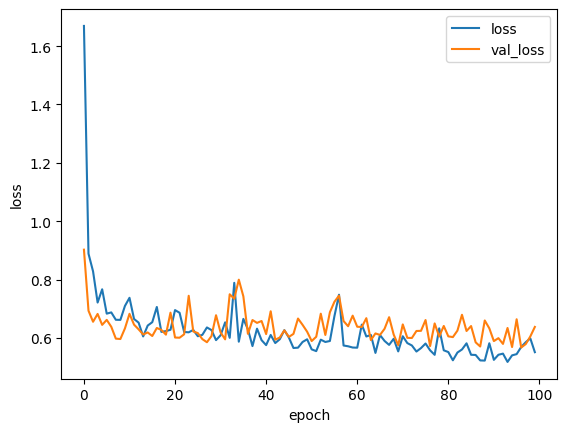

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

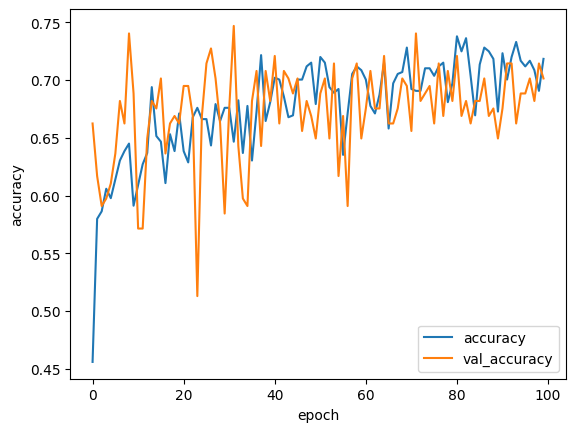

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()